In [6]:
import sys
sys.path.append('../')
import re
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

In [7]:
train_df = pd.read_csv('../input/original/train_round_0.csv', sep=',')
test_df = pd.read_csv('../input/original/test_data_r0.csv', sep=',')

In [8]:
train_df.head(1)

,answer,bridging_entity,content1,content2,content3,content4,content5,keyword,question,supporting_paragraph,title1,title2,title3,title4,title5,question_id
0,@content5@卡尔文森号航母@content5@,无,据美国媒体9月10日报道称，近日部署在美国东海岸多个军事基地的3艘核动力航母出现了罕见的一幕...,艾森豪威尔号航空母舰。它是美国尼米兹级核动力航空母舰的二号舰，舰名承袭自参加过第二次世界大战...,自2016年以来，美国海军第一次出现两艘核动力航母齐聚地中海的特殊部署，这意味着美国准备对某...,伊朗塔斯尼姆通讯社日前在社交媒体上发布了一段视频，视频中显示一艘航母在驱逐舰的护航下正在海面...,作为全世界唯一的超级大国，美国拥有10艘尼米兹核动力航母，其航母舰队和海军实力足以能够秒杀任...,“艾森豪威尔”号核动力航母,参与美韩举行的“鹞鹰”联合军演的是哪艘航母？,@content5@如今抵达西太平洋的美卡尔文森号航母，已经在该地区执行了一个多月的任务，并...,美军3艘核动力航母紧急机动，情况十分突然 高官：差点出了大事！,世界上最先进的航空母舰：艾森豪威尔号航空母舰！,局势十分紧张，美军两艘超级航母坐镇地中海 在向谁发出警告？,美航母抵近伊朗，伊战机紧急起飞，传回现场画面：甲板满是战机,美法曾联手包围俄航母 如今四国又来给中国添堵,Q_05193ghdyd


In [9]:
train_df['answer_str'] = train_df['answer'].str.replace('@content\d@', '')

## url 链接

In [ ]:
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
url_pattern1 = re.compile(URL_REGEX)
URL_REGEX = r'[^\u4e00-\u9fa5|[$-_@.&+]]*(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
url_pattern2 = re.compile(URL_REGEX)


def fetch_urls(text):
    """ 获取 url 链接，作为整体参与分词 """
    text = text.replace('http：//', 'http://')
    text = text.replace('https：//', 'https://')

    valid_urls = []
    coarse_urls = url_pattern1.findall(text)
    for c_url in coarse_urls:
        c_urls = [c_url]
        if c_url.count('http') > 1:
            c_urls = ['http://' + u for u in c_url.split('http://') if u != '']

        for c_url in c_urls:
            fine_urls = url_pattern2.findall(c_url)
            for f_u in fine_urls:
                if '.' in f_u and len(f_u) > 5:
                    f_u = re.sub('[，。？、￥（）；：…]+', '', f_u)
                    valid_urls.append(f_u)
    return valid_urls

In [ ]:
train_df['answer_str'].map(fetch_urls).map(len).value_counts()

**答案不包含 url 链接，因此数据清洗阶段直接去除 url**

In [ ]:
train_df['content1_url_cnt'] = train_df['content1'].map(fetch_urls).map(len)

In [ ]:
sns.countplot(train_df[train_df['content1_url_cnt'] > 0]['content1_url_cnt'])

## html标签

In [ ]:
html_pattern = re.compile(r'<.*?>')
zhPattern = re.compile(u'[\u4e00-\u9fa5]+')

def find_html(text):
    text = re.sub('<{2,}', '', text)  # <<<
    # <> 中包含中文的
    text = re.sub('<；；', '', text)
    text = re.sub('([\u4e00-\u9fa5]+)>', '\g<1>', text)
    text = re.sub('<([\u4e00-\u9fa5]+)>', '\g<1>', text)
    tags = html_pattern.findall(text)
    
    new_tags = []
    for tag in tags:
        match = zhPattern.search(tag)
        if not match:
            new_tags.append(tag)
    return new_tags

In [ ]:
for rid, row in train_df.iterrows():
    unicode_space = find_html(row['answer_str'])
    if len(unicode_space) > 0:
        print(unicode_space)
        print(row['answer_str'])
        print(re.sub('<(.*[\u4e00-\u9fa5]+.*)>', '\g<1>', row['answer_str']))

In [ ]:
for rid, row in train_df.iterrows():
    unicode_space = find_html(row['content1']) + find_html(row['content2']) + find_html(row['content3']) + \
                    find_html(row['content4']) + find_html(row['content5'])
    if len(unicode_space) > 0:
        print(unicode_space)

## 重复的标点符号

In [ ]:
def duplacte_words(text):
    """
    去除很多重复的词和标点符号
    """
    reg = r'([^0-9IX]+)(\1){2,}'
    for i in range(6):
        temp = text
        text = re.sub(reg, lambda m: m.group(1), text)
        if len(text) == len(temp):
            break
    return text


## 其他基于正则的特殊字符清洗

In [ ]:
pattern = re.compile(r'(\!|\"|\#|\$|\%|\&|\'|\(|\)|\*|\+|\,|\-|\.|\/|\:|\;|\<|\=|\>|\?|\@|\[|\\|\]|\^|\_|\`|\{|\||\}|\~)\1{1,}')

In [ ]:
for rid, row in train_df.iterrows():
    result = ans_pattern.findall(row['content1'])
    if len(result) > 0:
        print(result)

In [ ]:
# 图11: r'图\d+'
# 记者: r'\(记者[^\)]*\){1}'
# [ 转自铁血社区 http://bbs.tiexue.net/ ]

In [97]:
pat = re.compile(r'\[ 转自铁血社区 \]')

def find(text):
    r = pat.findall(text)
    if len(r) == 0:
        return ''
    else:
        return ''.join(r)


In [98]:
train_df['has_jizhe'] = train_df['content2'].map(find)

In [99]:
train_df[train_df['has_jizhe'] != '']['has_jizhe'].values

array([], dtype=object)

## 清洗之后的长度统计

In [39]:
import json

train_content1_len = []
train_content2_len = []
train_content3_len = []
train_content4_len = []
train_content5_len = []
with open('../input/cleaned/train_round_0.json') as f:
    for line in f:
        sample = json.loads(line.strip())
        docs = sample['documents']
        train_content1_len.append(len(''.join(docs[0]['paragraphs'])))
        train_content2_len.append(len(''.join(docs[1]['paragraphs'])))
        train_content3_len.append(len(''.join(docs[2]['paragraphs'])))
        train_content4_len.append(len(''.join(docs[3]['paragraphs'])))
        train_content5_len.append(len(''.join(docs[4]['paragraphs'])))

## document 长度分布

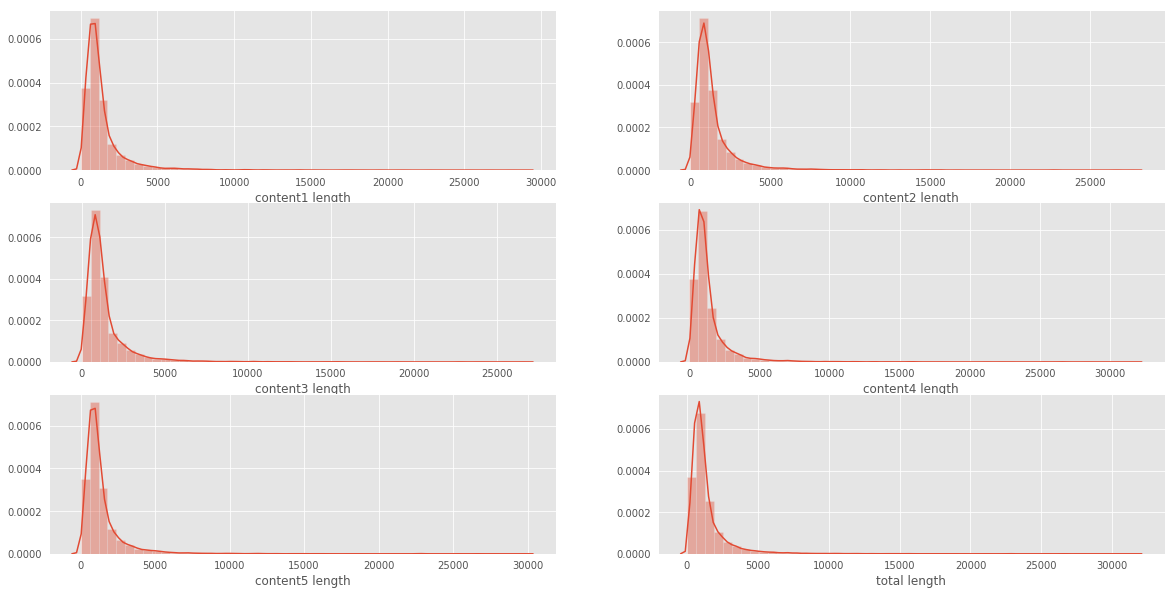

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.distplot(train_content1_len, axlabel='content1 length')
plt.subplot(322)
sns.distplot(train_content2_len, axlabel='content2 length')
plt.subplot(323)
sns.distplot(train_content3_len, axlabel='content3 length')
plt.subplot(324)
sns.distplot(train_content4_len, axlabel='content4 length')
plt.subplot(325)
sns.distplot(train_content5_len, axlabel='content5 length')
plt.subplot(326)
sns.distplot(train_content1_len + train_content2_len + train_content3_len + 
             train_content4_len + train_content5_len, axlabel='total length')
plt.show()

## document 的段落数分布

In [4]:
import json

train_content1_paras = []
train_content2_paras = []
train_content3_paras = []
train_content4_paras = []
train_content5_paras = []
with open('../input/cleaned/train_round_0.json') as f:
    for line in f:
        sample = json.loads(line.strip())
        docs = sample['documents']
        train_content1_paras.append(len(docs[0]['paragraphs']))
        train_content2_paras.append(len(docs[1]['paragraphs']))
        train_content3_paras.append(len(docs[2]['paragraphs']))
        train_content4_paras.append(len(docs[3]['paragraphs']))
        train_content5_paras.append(len(docs[4]['paragraphs']))

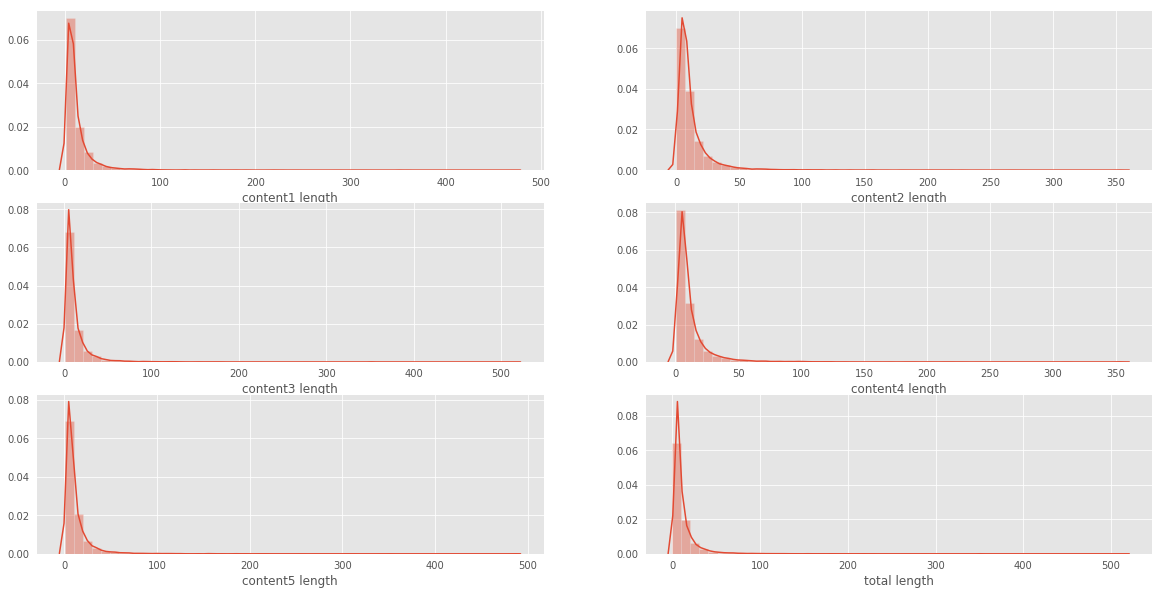

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.distplot(train_content1_paras, axlabel='content1 length')
plt.subplot(322)
sns.distplot(train_content2_paras, axlabel='content2 length')
plt.subplot(323)
sns.distplot(train_content3_paras, axlabel='content3 length')
plt.subplot(324)
sns.distplot(train_content4_paras, axlabel='content4 length')
plt.subplot(325)
sns.distplot(train_content5_paras, axlabel='content5 length')
plt.subplot(326)
sns.distplot(train_content1_paras + train_content2_paras + train_content3_paras + 
             train_content4_paras + train_content5_paras, axlabel='total length')
plt.show()